## 支持向量机使用到哪些参数，如何使用

In [26]:
import ssl
ssl.create_default_https_context = ssl._create_unverified_context

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

import seaborn as sns; sns.set()

## $z = x^2 + y^2$
### 如何解决这个不可分问题？映射到高维来试试，从sklearn.datasets这里下载
### cluster_std 就是用来调节散点分散程度

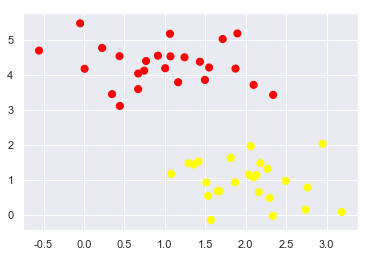

In [28]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

X

In [29]:
X[:, 0]

array([ 1.41281595,  1.81336135,  1.43289271,  1.87271752,  2.09517785,
        2.73890793,  3.18515794,  2.06156753,  2.03835818, -0.04749204,
        1.71444449,  0.22459286,  1.06923853,  1.53278923,  1.4949318 ,
        1.1641107 ,  0.74387399,  2.29667251,  0.44359863,  0.91433877,
        1.67467427,  2.26908736,  1.5108885 ,  1.65179125,  2.49272186,
        2.33812285,  0.67047877, -0.55552381,  2.16172321,  2.09680487,
        2.18023251,  0.43899014,  1.24258802,  0.00793137,  1.89593761,
        1.868336  ,  2.13141478,  1.06269622,  2.33466499,  0.669787  ,
        1.07714851,  1.54632313,  1.56737975,  1.35617762,  1.00372519,
        1.29297652,  2.94821884,  0.3471383 ,  2.76253526,  0.76752279])

In [30]:
X[:, 1]

array([ 1.5303347 ,  1.6311307 ,  4.37679234,  4.18069237,  1.0791468 ,
        0.15676817,  0.08900822,  1.96918596,  1.15466278,  5.47425256,
        5.02521524,  4.77028154,  4.53068484,  0.55035386,  3.85848832,
        3.79132988,  4.12240568,  0.48677761,  3.11530945,  4.55014643,
        0.68001896,  1.32160756,  0.9288309 ,  0.68193176,  0.97505341,
        3.43116792,  4.04094275,  4.69595848,  0.6565951 ,  3.7174206 ,
        1.48364708,  4.53592883,  4.50399192,  4.17614316,  5.18540259,
        0.93136287,  1.13885728,  5.17635143, -0.02408255,  3.59540802,
        1.17533301,  4.212973  , -0.1381059 ,  1.43815955,  4.19147702,
        1.47930168,  2.03519717,  3.45177657,  0.78970876,  4.39759671])

In [31]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

## 随便画几条分割线，看看哪条好

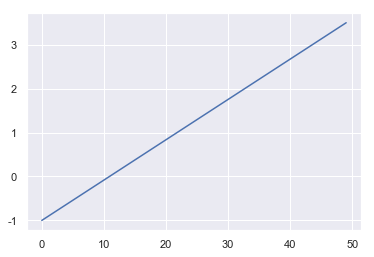

In [32]:
plt.plot(np.linspace(-1, 3.5))

(-1, 3.5)

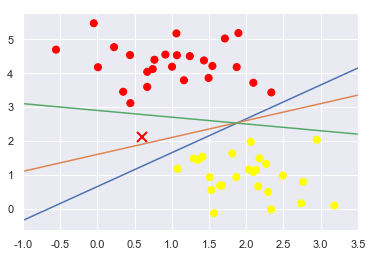

In [33]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# 画一个红色的X，坐标为[0.6，2.1]
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b)
plt.xlim(-1, 3.5) # x域-1到3.5

In [34]:
# 代码小片段分析
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    print(m, b)

1 0.65
0.5 1.6
-0.2 2.9


# Support Vector Machines：最小化 雷区
#### 找到支持向量

(-1, 3.5)

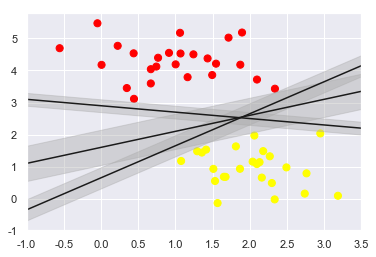

In [35]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color="#AAAAAA", alpha=0.4)
plt.xlim(-1, 3.5)

## 设计一个基本的SVM

In [36]:
# 引入核函数为线性的SVC
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
#绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

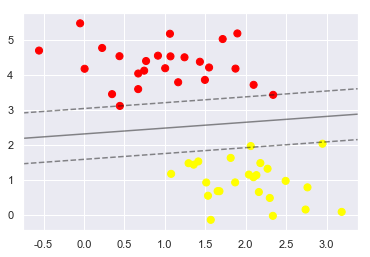

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

### 上面👆这里不是很明白，为什么cluster_std设置为0.6就刚刚好

- 上面有三个点是决定着支持向量机的三个向量，也就是支持向量
- 在Scikit-Learn中，他们存储在这个位置 support_vectors_ (一个属性)
- 下面看看这些向量的坐标在哪里

In [39]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- 使用60个或者120个数据点会如何？

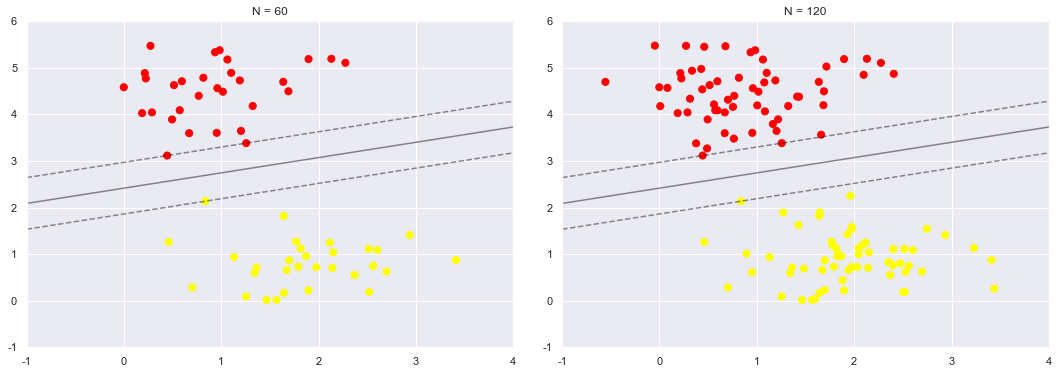

In [40]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# 画两个图
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# 引入核函数的SVM
- 首先看看线性核函数还能不能分下面的数据集

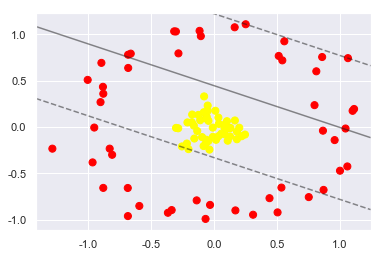

In [41]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

- 线性核函数不能分出来
- 试试高维核函数

### 这里引入mpl_toolkits 来画出3D的图像

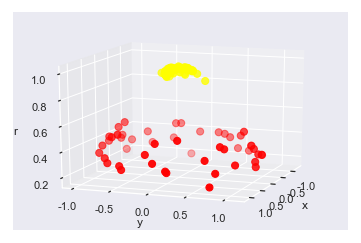

In [42]:
# 加入了新的维度r
from mpl_toolkits import mplot3d
# 内积，升维公式
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
# elev 和 azim 就像遥控器一样可以旋转整个3D图像
plot_3D(elev=15, azim=20, X=X, y=y)

In [43]:
# 加入径向基函数
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

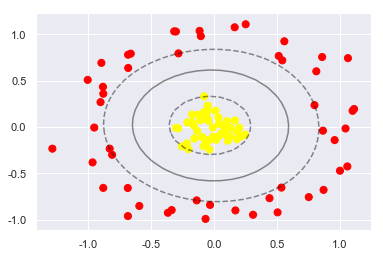

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s= 300, lw=1, facecolors='none')

### 这个就是属于非线性决策边界， 这种核变换策略经常被使用

##  调节SVM的参数：soft_margin
###  调节C参数和gamma参数
#### C参数
- c趋于无穷大时候，分类严格不能有错误
- c趋于很小的时候，可以容忍更大的错误

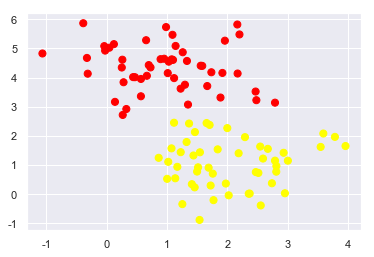

In [45]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

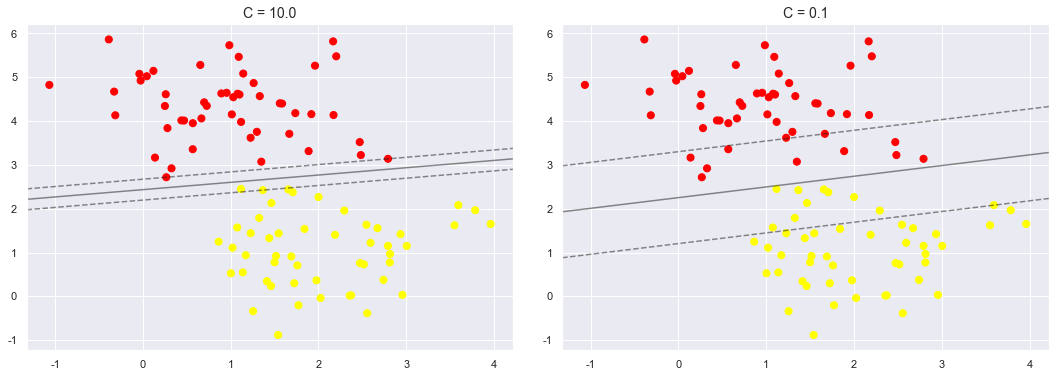

In [46]:
#这个方法会生成两个数据
X, y= make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
# 画两个坐标图，指定大小（一行二列）
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# 指定C的值为10.0和0.1, 传入到SVC的对象里面
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 1], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)



### C = 10 ，隔离带里面都没有任何一个点， 决策边界相对较窄
### C = 0.1，隔离带里面可以好几个点，决策边界相对较宽

#### 调节gamma参数

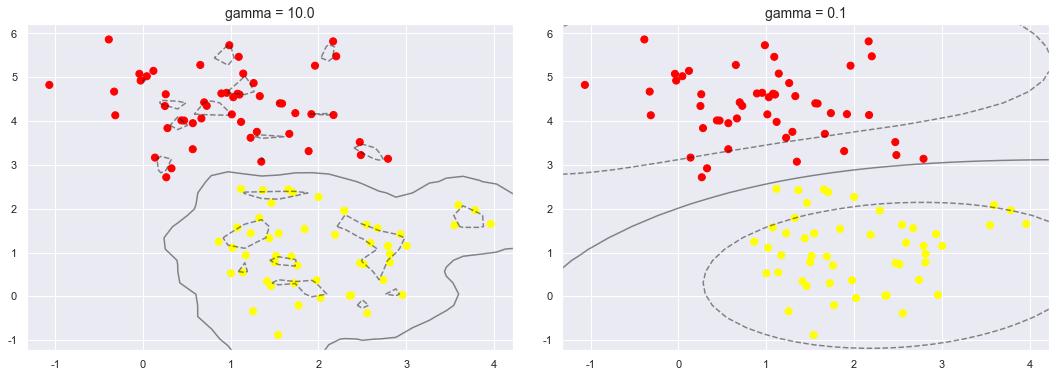

In [47]:
# 生成两个数据
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# 画出两个坐标图，指定大小
for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)
    # fig调节subs的大小

# 使用gamma的值为10和0.1 传入到SVC的模型里面

## 人脸识别：Face Recognition
### 下载照片的时候，就算在最前面加了ssl也于事无补，得把ssl加在当下
### import ssl
### ssl._create_default_https_context = ssl._create_unverified_context

In [51]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.datasets import fetch_lfw_people
# 拿到60张脸
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

# 下载时间好长啊，早知道调小一些好了，慢慢等吧，我们把下面的代码逻辑写好先

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


fig, ax= plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

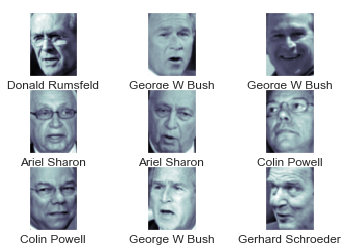

In [72]:
fig, ax= plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### 这里，每一张图片的像素就是特征，但是特征太多，要使用PCA降维
### pipeline的目的就是当设置不同的参数时组合几个可以一起交叉验证的步骤。所以可以使用组合这几个步骤的名字和它们的属性参数(不过需要在参数前面加_来连接)

In [73]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [74]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [76]:
# 分割训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=40)


## 使用grid search cross-validation 来选择我们的参数

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'svc__C':[1, 5, 10],
             'svc__gamma':[0.0001, 0.0005, 0.001]}

In [79]:
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 14.3 s, sys: 671 ms, total: 15 s
Wall time: 10.6 s
{'svc__C': 5, 'svc__gamma': 0.0005}


In [80]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape

(320,)

Text(0.5,0.98,'Predicted Names; Incorrect Labels in Red')

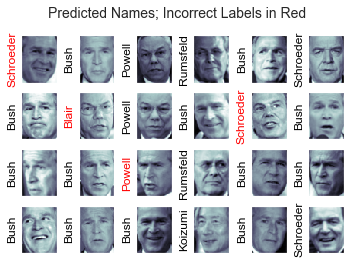

In [84]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
# 预测不正确的名字显示红色
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.71      0.76        24
     Colin Powell       0.71      0.81      0.76        54
  Donald Rumsfeld       0.75      0.80      0.77        30
    George W Bush       0.91      0.83      0.87       119
Gerhard Schroeder       0.78      0.91      0.84        34
Junichiro Koizumi       0.86      0.86      0.86        14
       Tony Blair       0.86      0.80      0.83        45

        micro avg       0.82      0.82      0.82       320
        macro avg       0.81      0.82      0.81       320
     weighted avg       0.83      0.82      0.82       320



- 精度(precision) = 正确预测的个数(TP)/被预测正确的个数(TP+FP)
- 召回率(recall) = 正确预测的个数(TP)/预测个数(TP+FN)
- F1 = 2 * 精度 * 召回率/ (精度 + 召回率)

### 引入混淆矩阵

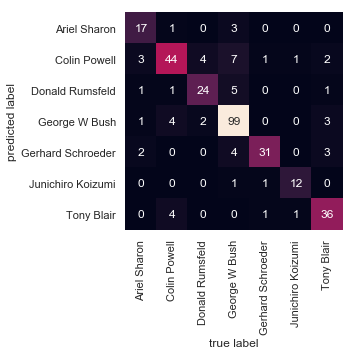

In [87]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');